# Clustering de documents

## Imports

In [29]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [30]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\durie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\durie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
data_path = "../data/txt/"

## Choisir une décennie

In [32]:
DECADE = '1940'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

Ici, prends les fichiers qui contiennent 1950 - 1 donc 195 et donc tous ceux de cette décennie

In [33]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [34]:
# Exemple de fichiers
files[:5]

['KB_JB838_1940-01-04_01-00001.txt',
 'KB_JB838_1940-01-05_01-00009.txt',
 'KB_JB838_1940-01-07_01-00014.txt',
 'KB_JB838_1940-01-10_01-00003.txt',
 'KB_JB838_1940-01-11_01-00004.txt']

In [35]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [36]:
# Exemple de textes
texts[0][:400]

"54 e ANNEE. — N° 4. Pages - 40 C 1 *® 8 Grand-Duché : 45 centimes. - France : 75 centime». ABONNEMENTS pour la province on Province } s'abonne à là Poste CH' Vüle au $ pour | T , oi , ŒOl# 28>50 BUREAUX ET FILS SPÉCIAUX: — — ■ ; S Un an 170.00 Congo • j Six mol , 85X0 Etranger : Prix euivant conventions VENTE ET ABONNEM. : PLACE DE LOUVAIN. 23 □ SALLE DE DÉPÊCHES : 124. RUE ROYALE BRUXELLES G “ ■“"

## Vectoriser les documents à l'aide de TF-IDF

In [37]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [38]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [40]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [41]:
# Détail de la matrice
tfidf_vectors

<1000x4624 sparse matrix of type '<class 'numpy.float64'>'
	with 937940 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [42]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

gouvernement    0.158569
milieux         0.154846
cabinet         0.133397
neige           0.118083
politiques      0.117647
                  ...   
dépôts          0.000000
désigné         0.000000
désir           0.000000
désirent        0.000000
♦               0.000000
Length: 4624, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [43]:
cosine([1, 2, 3], [1, 2, 3])

0

In [44]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [45]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [46]:
tfidf_array = tfidf_vectors.toarray()

In [47]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
# Vecteur du document 1
tfidf_array[1]

array([0.00724655, 0.        , 0.        , ..., 0.00661311, 0.        ,
       0.        ])

In [49]:
cosine(tfidf_array[0], tfidf_array[1])

0.9552448586835468

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [50]:
N_CLUSTERS = 2

### Instancier le modèle K-Means et ses arguments

In [51]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [52]:
clusters = km_model.fit_predict(tfidf_vectors)

In [53]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [54]:
i = 2

In [55]:
clu0_path = f'../data/clu{i}'

In [56]:
os.makedirs(clu0_path,exist_ok=True)

In [58]:
l = clustering[i]
l[0]

IndexError: list index out of range

In [ ]:
files_clu0 = [f for f in sorted(os.listdir(data_path)) if f in l]

In [ ]:
content_list = []
for f in files_clu0:
    with open(os.path.join(data_path, f), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [ ]:
with open(os.path.join(clu0_path, f'clu{i}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [ ]:
pprint(dict(clustering))

{0: ['KB_JB838_1940-01-04_01-00001.txt',
     'KB_JB838_1940-01-10_01-00003.txt',
     'KB_JB838_1940-01-11_01-00004.txt',
     'KB_JB838_1940-01-19_01-00005.txt',
     'KB_JB838_1940-01-27_01-00004.txt',
     'KB_JB838_1940-01-31_01-00002.txt',
     'KB_JB838_1940-02-06_01-00005.txt',
     'KB_JB838_1940-02-07_01-00004.txt',
     'KB_JB838_1940-02-07_01-00005.txt',
     'KB_JB838_1940-02-09_01-00005.txt',
     'KB_JB838_1940-02-12_01-00005.txt',
     'KB_JB838_1940-02-25_01-00006.txt',
     'KB_JB838_1940-02-29_01-00005.txt',
     'KB_JB838_1940-03-01_01-00003.txt',
     'KB_JB838_1940-03-03_01-00004.txt',
     'KB_JB838_1940-03-04_01-00005.txt',
     'KB_JB838_1940-03-10_01-00003.txt',
     'KB_JB838_1940-03-31_01-00002.txt',
     'KB_JB838_1940-04-16_01-00003.txt',
     'KB_JB838_1940-04-19_01-00004.txt',
     'KB_JB838_1940-04-22_01-00005.txt',
     'KB_JB838_1940-04-29_01-00001.txt',
     'KB_JB838_1940-05-02_01-00002.txt',
     'KB_JB838_1940-05-02_01-00004.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [ ]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [ ]:
reduced_vectors[:10]

array([[-0.26190105,  0.17151785],
       [ 0.61374839,  0.18336639],
       [ 0.12160863, -0.07555842],
       [-0.29838524,  0.28161151],
       [-0.26392005,  0.1325399 ],
       [-0.19549471, -0.15440958],
       [-0.28401744,  0.19462464],
       [-0.2508514 ,  0.1419611 ],
       [-0.11618199, -0.14690365],
       [ 0.45518693,  0.04279942]])

### Générer le plot

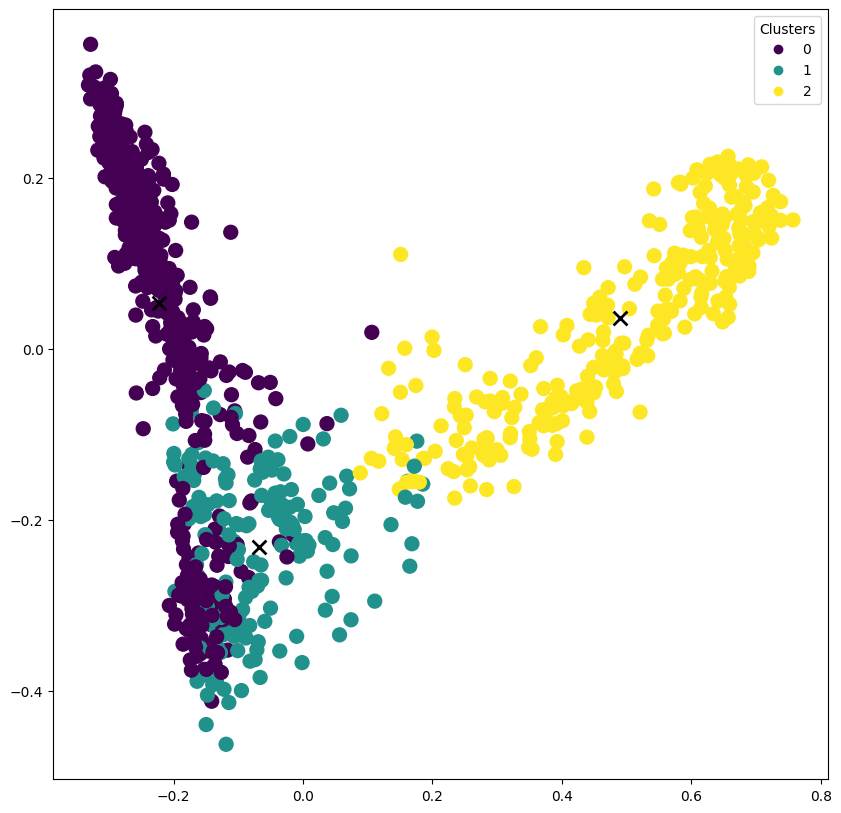

In [ ]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

Pour le tp, même exercice. Essayer de voir les thèmes de chaque clusters. Avoir des ensembles cohérents. Intégrer nuage de mots. On sélectionne le corpus, on vectoriser les textes et ensuite on entraine l'algo. Quand on trouve la bonne dimension, on explore les clusters. Analyser les mots importants. Bien nettoyer le nuage de mots. 